Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

In [1]:
# Choose your target. Which column in your tabular dataset will you predict?:
#       -(COLUMN I CREATE CALLED 'HIGHCOST' which will have 2 different available entries: yes or no)
# Is your problem regression or classification?:
#       -CLASSIFICATION [HighCost])
# How is your target distributed?
# Classification: How many classes? Are the classes imbalanced?:
#       -(TWO; no) cutoff point between low and high cost is $1.41
# Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy 
# if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, 
# in addition to or instead of accuracy?:
#       -
# Choose which observations you will use to train, validate, and test your model:
#       -(AVERAGEPRICE, TOTALVOLUME, TOTALBAGS, TYPE & REGION)
# Are some observations outliers? Will you exclude them?:
#       -THERE ARE OUTLIERS/WILL INCLUDE THEM
# Will you do a random split or a time-based split? 
#       -RANDOM SPLIT
# Begin to clean and explore your data.
# Begin to choose which features, if any, to exclude. Would some features "leak" future information? 
#       -(WILL PROBABLY EXCLUDE THE 'PLU' COLUMNS & SIZE OF BAGS COLUMNS)

In [1]:
import pandas as pd

In [2]:
# Importing dataset about the average price per avocado:
df = pd.read_csv('avocado.csv')

In [3]:
# Examining df:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
# Getting a sample of the data:
df.sample(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
15759,11,2017-10-15,1.57,10795.73,166.96,1439.70,0.00,9171.38,7466.67,1704.71,0.00,organic,2017,Indianapolis
8058,4,2017-12-03,1.21,3452207.00,2032331.00,328178.00,21381.00,1070317.00,737179.00,318086.00,15051.00,conventional,2017,Southeast
4683,3,2016-12-04,1.00,594246.50,109778.14,143749.16,11803.23,328915.97,325918.13,2557.73,440.11,conventional,2016,Portland
10808,18,2015-08-23,1.99,4617.21,490.29,1959.09,15.90,2151.93,2140.52,11.41,0.00,organic,2015,Philadelphia
3322,46,2016-02-07,0.81,302337.87,4898.28,177380.94,30149.60,89909.05,22076.72,61180.85,6651.48,conventional,2016,CincinnatiDayton


In [5]:
# Looking at df's shape:
df.shape

(18249, 14)

In [6]:
# Check for NaN/null values:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

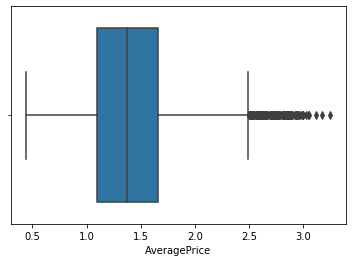

In [7]:
# Looking for outliers:
import seaborn as sns
sns.boxplot(x=df['AveragePrice']);

In [8]:
# Removing outliers to check if I get different results.
# Removing any rows where value in 'AveragePrice' is >= 2.5:
# df = df[df['AveragePrice'] < 2.5]
# df.head()

In [9]:
# Checking spread of values to determine how to
# Make my target column
# df['AveragePrice'].describe()

In [10]:
# Making target column called 'HighCost',
# Then looking at sample of data:
# import numpy as np
# df['HighCost'] = np.where(df['AveragePrice'] >= 1.41, 'yes', 'no')
# df.sample(5)

In [11]:
# Renaming column Unnamed:0 to 'PurchaseInstance':
# df = df.rename({'Unnamed: 0': 'PurchaseInstance'}, axis=1)
# df.sample(5)

In [8]:
# Dropping columns for PLU, and bag size:  (adding average price as it tends to overfit)
df = df.drop(columns=['4046', '4225', '4770', 'Small Bags', 'XLarge Bags', 'Total Volume', 'Total Bags'])
df.head()

,Unnamed: 0,Date,AveragePrice,Large Bags,type,year,region
0,0,2015-12-27,1.33,93.25,conventional,2015,Albany
1,1,2015-12-20,1.35,97.49,conventional,2015,Albany
2,2,2015-12-13,0.93,103.14,conventional,2015,Albany
3,3,2015-12-06,1.08,133.76,conventional,2015,Albany
4,4,2015-11-29,1.28,197.69,conventional,2015,Albany


In [9]:
# Converting 'Date' to datetime:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
df.head()

,Unnamed: 0,Date,AveragePrice,Large Bags,type,year,region
0,0,2015-12-27,1.33,93.25,conventional,2015,Albany
1,1,2015-12-20,1.35,97.49,conventional,2015,Albany
2,2,2015-12-13,0.93,103.14,conventional,2015,Albany
3,3,2015-12-06,1.08,133.76,conventional,2015,Albany
4,4,2015-11-29,1.28,197.69,conventional,2015,Albany


In [10]:
# Extracting 'Month' from 'Date', (since time of year may be a determining
# factor when predicting price) then dropping 'Date':
df['MonthRecorded'] = df['Date'].dt.month
df = df.drop(columns='Date')
df.head()

,Unnamed: 0,AveragePrice,Large Bags,type,year,region,MonthRecorded
0,0,1.33,93.25,conventional,2015,Albany,12
1,1,1.35,97.49,conventional,2015,Albany,12
2,2,0.93,103.14,conventional,2015,Albany,12
3,3,1.08,133.76,conventional,2015,Albany,12
4,4,1.28,197.69,conventional,2015,Albany,11


In [15]:
# Removing column called PurchaseInstance, as I don't think it's needed:
# df = df.drop(columns='PurchaseInstance')
# df.head()

In [11]:
# Determining the majority class:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, random_state=42)
train.shape, test.shape

((13686, 7), (4563, 7))

In [12]:
target = 'type'
y_train = train[target]
y_train.value_counts(normalize=True)

conventional    0.502046
organic         0.497954
Name: type, dtype: float64

In [13]:
# Majority Class for every prediction:
majority_class = y_train.mode()[0]
y_pred_train = [majority_class]*len(y_train)

In [14]:
# Getting accuracy score:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred_train)

0.5020458863071752

In [20]:
# Assignment for Sunday, April 26th 2020:
# Continue to clean and explore your data.
# For the evaluation metric you chose, what score would you get just by guessing?
# Can you make a fast, first model that beats guessing?

In [15]:
# Removing the dependant variable/target from test:
test = test.drop(columns='type')
train.shape, test.shape

((13686, 7), (4563, 6))

In [16]:
# Splitting into train, val & test:
train, val = train_test_split(train, train_size=0.80, test_size=0.20,
                             stratify=train['type'], random_state=42)
train.shape, val.shape, test.shape

((10948, 7), (2738, 7), (4563, 6))

In [17]:
target = 'type'
y_train = train[target]
y_train.value_counts(normalize=True)

conventional    0.502009
organic         0.497991
Name: type, dtype: float64

In [18]:
# Majority Class for every prediction a 2nd time:
majority_class = y_train.mode()[0]
y_pred_train = [majority_class]*len(y_train)

In [19]:
# Accuracy score a 2nd time:
accuracy_score(y_train, y_pred_train)

0.5020094994519547

In [20]:
y_val = val[target]
y_pred = [majority_class]*len(y_val)
accuracy_score(y_val, y_pred)

0.502191380569759

In [21]:
# Manually selecting features:
features = ['region', 'MonthRecorded', 'year', 'Large Bags', 'AveragePrice']

In [22]:
# Arrange the data into features and target:
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

In [23]:
# Imports to start the pipeline:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

In [24]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.9214755295836377


In [25]:
pipeline.predict(X_test)

array(['conventional', 'conventional', 'organic', ..., 'organic',
       'conventional', 'organic'], dtype=object)

In [26]:
# Begin Module 3
# Permutation and xgboost:
# Getting importances:
randfor = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(randfor.feature_importances_, X_train.columns)

In [27]:
# Plot the feature importances:
import matplotlib.pyplot as plt

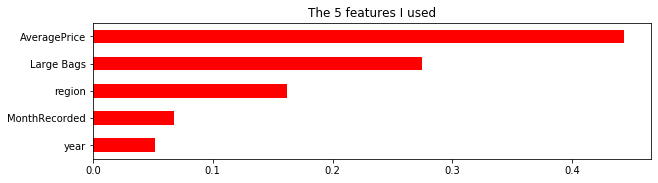

In [28]:
n = 5
plt.figure(figsize=(10,n/2))
plt.title(f'The {n} features I used')
importances.sort_values()[-n:].plot.barh(color='red');

In [29]:
# Permutation importance w/ eli5:
transformers = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    SimpleImputer()
)

X_train_tranformed = transformers.fit_transform(X_train)
X_val_tranformed = transformers.transform(X_val)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_tranformed, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [30]:
import eli5
from eli5.sklearn import PermutationImportance

C:\Users\kushnap\Miniconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\kushnap\Miniconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [31]:
permuter = PermutationImportance(
    model,
    scoring='accuracy',
    n_iter=10,
    random_state=42
)

permuter.fit(X_val_tranformed, y_val)

PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fr

In [32]:
feature_names = X_val.columns.to_list()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=True)

MonthRecorded    0.044777
year             0.062820
region           0.094704
Large Bags       0.144741
AveragePrice     0.302593
dtype: float64

In [33]:
permuter.feature_importances_std_

array([0.00451484, 0.0048979 , 0.00337912, 0.00504507, 0.00721133])

In [34]:
# Number of features * number of iterations:
n*10

50

In [35]:
eli5.show_weights(permuter, 
                  top=None, 
                  feature_names=feature_names)

Weight,Feature
0.3026 ± 0.0144,AveragePrice
0.1447 ± 0.0101,Large Bags
0.0947 ± 0.0090,region
0.0628 ± 0.0068,year
0.0448 ± 0.0098,MonthRecorded


In [36]:
# XGBoost:
from xgboost import XGBClassifier

pipeline = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['region'], drop_invariant=False,
                                handle_missing='value', handle_unknown='value',
                                mapping=[{'col': 'region',
                                          'data_type': dtype('O'),
                                          'mapping': Plains                  1
Spokane                 2
Roanoke                 3
Syracuse                4
Louisville              5
BaltimoreWashington     6
SouthCarolina           7
TotalUS                 8
Charlotte               9
HarrisburgScranton     10
Midsouth               11
Orlando                12
BuffaloRochest...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
     

In [37]:
from sklearn.metrics import accuracy_score

y_pred = pipeline.predict(X_val)
print(f'Val accuracy: {accuracy_score(y_val, y_pred)}')

Val accuracy: 0.8747260774287802


In [ ]:
# Begin assignment for module 4:
# Make at least 1 partial dependence plot to explain your model.
# Make at least 1 Shapley force plot to explain an individual prediction.
# Share at least 1 visualization (of any type) on Slack!

In [ ]:
# I am still working on how to LabelEncode or OHE my columns in order for
# The next several cells to work.

In [39]:
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

gb = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBRegressor(n_estimators=200, objective='reg:squarederror', n_jobs=-1)
)

gb.fit(X_train, y_train)
y_pred = gb.predict(X_val)
print('Gradient Boosting R^2', r2_score(y_val, y_pred))

TypeError: must be real number, not str

In [ ]:
# I can do the next cells once the above are corrected:

In [40]:
# Partial Dependence Plots w/ 1 feature:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 72

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot

depfeature = 'AveragePrice'

isolated = pdp_isolate(
    model=gb,
    dataset=X_val,
    model_features=X_val.columns,
    feature=depfeature
)